> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigation movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
movies_data.shape

(10866, 21)

In [6]:
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
movies_data.budget.isin([0]).sum()

5696

In [8]:
movies_data.revenue.isin([0]).sum()

6016

In [9]:
movies_data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

# 1-removing unwanted columns
# 2-replacing 0 valuse with null
# 3- removing null values
# 4-removing duplicate rows
# 5-fixing date




In [10]:
# removing unwanted columns

movies_data.drop(['id', 'imdb_id','homepage','tagline','overview','keywords'], axis=1, inplace=True)

In [11]:
#test
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [31]:
#replacing 0 values with null
movies_data = movies_data.replace(0, np.nan)

In [32]:
#dropping null 
movies_data.dropna()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08


In [38]:
# testing
movies_data.budget.isin([0]).sum()

0

In [39]:
# testing
movies_data.revenue.isin([0]).sum()

0

In [59]:
#test
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 475.6+ KB


In [29]:
#refinning (production_companies)column,
movies_data.dropna(inplace=True)


In [30]:
#test
movies_data['production_companies'].isna().value_counts()

False    3805
Name: production_companies, dtype: int64

In [33]:
#test
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 15 columns):
popularity              3805 non-null float64
budget                  3805 non-null float64
revenue                 3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 475.6+ KB


In [34]:
# removing duplicate rows
movies_data.drop_duplicates(inplace = True)

In [35]:
#test
movies_data.shape

(3805, 15)

In [46]:
#fix date
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data['release_date'].head()


0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



# exploring single variables
# (1)budget

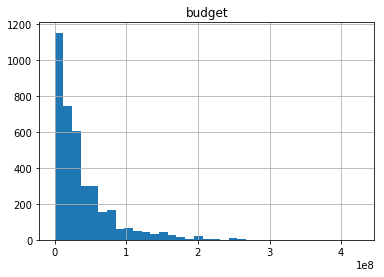

In [57]:
movies_data.hist(column='budget',bins=35);

# (2) revenues

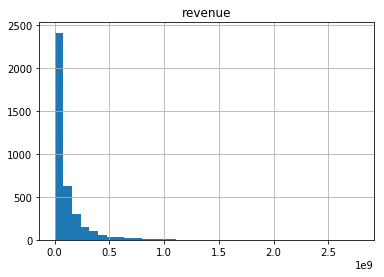

In [58]:
movies_data.hist(column='revenue',bins=35);

# (3) popularity

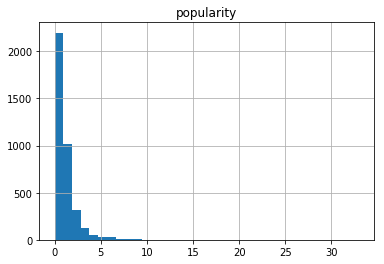

In [61]:
movies_data.hist(column='popularity',bins=35);

# Research Question: productivity over time
# (1) for year?

In [82]:

movies_data.groupby('release_year').size()

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     47
1987     46
1988     56
1989     51
1990     52
1991     50
1992     53
1993     72
1994     61
1995     79
1996     84
1997     90
1998     90
1999    116
2000    104
2001    118
2002    125
2003    121
2004    142
2005    159
2006    168
2007    159
2008    161
2009    170
2010    177
2011    196
2012    157
2013    179
2014    165
2015    160
dtype: int64

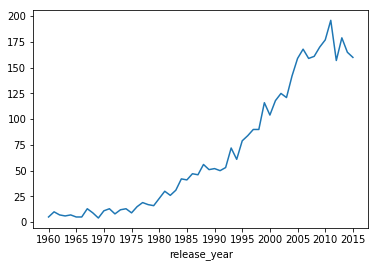

In [77]:
movies_data.groupby('release_year').size().plot(xticks = np.arange(1960,2016,5))

# insights
2010 was the highest productivity 

# (2) Genres?

In [84]:
movies_data.groupby('genres')['release_year'].count().sort_values(ascending=False)[:20]

genres
Drama                          243
Comedy                         230
Drama|Romance                  106
Comedy|Romance                 103
Comedy|Drama|Romance            87
Comedy|Drama                    85
Horror|Thriller                 80
Horror                          57
Drama|Thriller                  47
Action|Thriller                 39
Crime|Drama|Thriller            37
Drama|Comedy                    36
Comedy|Family                   32
Action|Crime|Thriller           31
Drama|Crime                     27
Drama|History                   27
Crime|Drama                     26
Drama|Comedy|Romance            25
Action|Crime|Drama|Thriller     25
Thriller                        25
Name: release_year, dtype: int64

Text(0,0.5,'frequency')

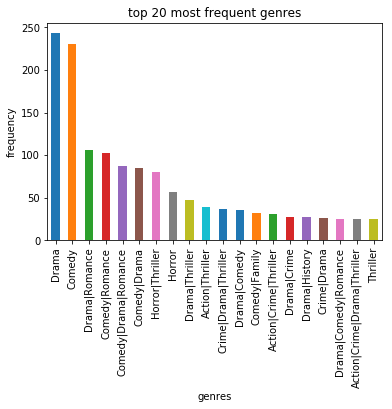

In [85]:

movies_data.groupby('genres')['release_year'].count().sort_values(ascending=False)[:20].plot.bar()
plt.title('top 20 most frequent genres')
plt.xlabel('genres')
plt.ylabel('frequency')



# insights
Drama is highest genre in production, thats indicates movie audience's taste

# (3) production company?

In [87]:
movies_data.groupby('production_companies')['original_title'].count().sort_values(ascending=False)[:20]

production_companies
Paramount Pictures                                    77
Universal Pictures                                    57
Columbia Pictures                                     39
New Line Cinema                                       38
Warner Bros.                                          33
Metro-Goldwyn-Mayer (MGM)                             26
Touchstone Pictures                                   24
Twentieth Century Fox Film Corporation                23
20th Century Fox                                      22
Walt Disney Pictures                                  22
Orion Pictures                                        17
Miramax Films                                         17
Columbia Pictures Corporation                         16
Dimension Films                                       16
United Artists                                        15
TriStar Pictures                                      15
DreamWorks Animation                                  15
Walt Disne

Text(0,0.5,'productivity')

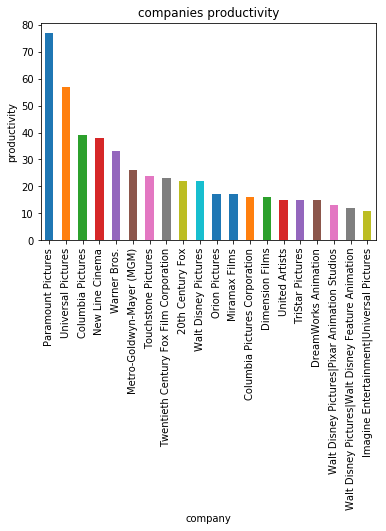

In [88]:
movies_data.groupby('production_companies')['original_title'].count().sort_values(ascending=False)[:20].plot.bar()
plt.title('companies productivity')
plt.xlabel('company')
plt.ylabel('productivity')

# insights
paramount pictures has the highest share in movie industry

# (4) director?

In [69]:
movies_data.groupby('director')['original_title'].count().sort_values(ascending=False)[:20]

director
Steven Spielberg        27
Clint Eastwood          24
Ridley Scott            21
Woody Allen             18
Martin Scorsese         17
Steven Soderbergh       17
Tim Burton              16
Oliver Stone            15
Robert Zemeckis         15
Renny Harlin            15
Brian De Palma          15
Ron Howard              14
Tony Scott              14
Joel Schumacher         14
Wes Craven              14
Richard Donner          13
Francis Ford Coppola    13
Robert Rodriguez        12
John Carpenter          12
Barry Levinson          12
Name: original_title, dtype: int64

Text(0,0.5,'frequency')

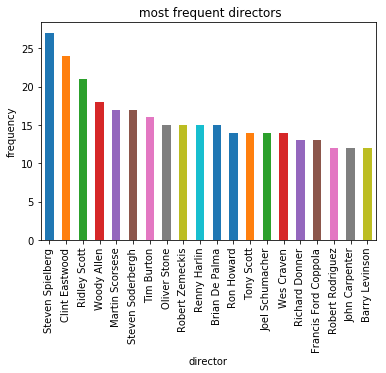

In [89]:
movies_data.groupby('director')['original_title'].count().sort_values(ascending=False)[:20].plot.bar()
plt.title(' most frequent directors')
plt.xlabel('director')
plt.ylabel('frequency')


# insights
Steven Spielberg  was the master(one of my favorite directors)

# (5) what is the highest company revenues?

In [74]:
movies_data.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)[:20]

production_companies
Walt Disney Pictures|Pixar Animation Studios                                                                  7.648559e+09
Paramount Pictures                                                                                            7.040938e+09
DreamWorks Animation                                                                                          6.676741e+09
Marvel Studios                                                                                                6.027809e+09
Columbia Pictures                                                                                             4.621240e+09
Blue Sky Studios|Twentieth Century Fox Animation                                                              3.938820e+09
Walt Disney Pictures|Walt Disney Animation Studios                                                            3.498727e+09
Universal Pictures|Illumination Entertainment                                                                 3.203801

Text(0,0.5,'company')

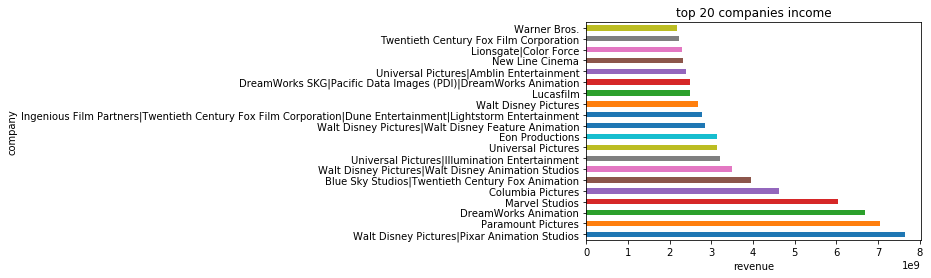

In [72]:
movies_data.groupby('production_companies')['revenue'].sum().sort_values(ascending=False)[:20].plot.barh()
plt.title('top 20 companies income')
plt.xlabel('revenue')
plt.ylabel('company')

# what is the highest movie revenues?

In [90]:
movies_data.groupby('original_title')['revenue'].sum().sort_values(ascending=False)[:20]

original_title
Avatar                                           2.781506e+09
Star Wars: The Force Awakens                     2.068178e+09
Titanic                                          1.845034e+09
The Avengers                                     1.568081e+09
Jurassic World                                   1.513529e+09
Furious 7                                        1.506249e+09
Avengers: Age of Ultron                          1.405036e+09
Harry Potter and the Deathly Hallows: Part 2     1.327818e+09
Frozen                                           1.274219e+09
Iron Man 3                                       1.215440e+09
Minions                                          1.156731e+09
Transformers: Dark of the Moon                   1.123747e+09
The Lord of the Rings: The Return of the King    1.118889e+09
Skyfall                                          1.108561e+09
The Net                                          1.106280e+09
The Dark Knight Rises                            1.0810

Text(0,0.5,'total revenue')

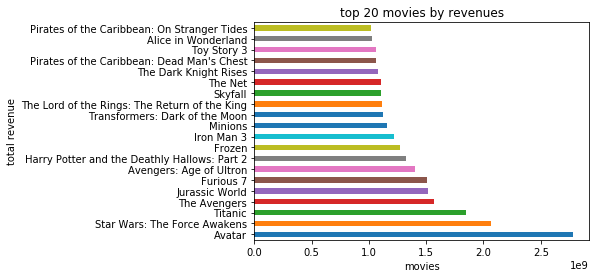

In [63]:
movies_data.groupby('original_title')['revenue'].sum().sort_values(ascending=False)[:20].plot.barh()
plt.title('top 20 movies by revenues')
plt.xlabel('movies')
plt.ylabel('total revenue')


# insights
avatar was the highest revenues

# (7) what is the highest movie budget?

In [75]:
movies_data.groupby('original_title')['budget'].sum().sort_values(ascending=False)[:20]

original_title
The Warrior's Way                               425000000.0
Pirates of the Caribbean: On Stranger Tides     380000000.0
Pirates of the Caribbean: At World's End        300000000.0
Godzilla                                        290000000.0
Avengers: Age of Ultron                         280000000.0
The Avengers                                    280000000.0
Superman Returns                                270000000.0
Tangled                                         260000000.0
John Carter                                     260000000.0
Spider-Man 3                                    258000000.0
The Lone Ranger                                 255000000.0
Harry Potter and the Deathly Hallows: Part 1    250000000.0
The Hobbit: The Desolation of Smaug             250000000.0
X-Men: Days of Future Past                      250000000.0
The Hobbit: The Battle of the Five Armies       250000000.0
The Hobbit: An Unexpected Journey               250000000.0
Harry Potter and the Half

Text(0,0.5,'movie')

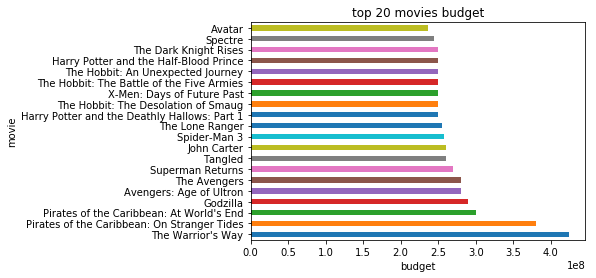

In [76]:
movies_data.groupby('original_title')['budget'].sum().sort_values(ascending=False)[:20].plot.barh()
plt.title('top 20 movies budget')
plt.xlabel('budget')
plt.ylabel('movie')


# insights
The Warrior's Way was the movie shows highest budget 

# (8)what is the movie with highest popularity?

In [231]:
movies_data.groupby('original_title')['popularity'].sum().sort_values(ascending=False)[:20]

original_title
Jurassic World                                       32.985763
Mad Max: Fury Road                                   28.419936
Interstellar                                         24.949134
Guardians of the Galaxy                              14.311205
Insurgent                                            13.112507
Captain America: The Winter Soldier                  12.971027
Star Wars                                            12.037933
John Wick                                            11.422751
Star Wars: The Force Awakens                         11.173104
The Hunger Games: Mockingjay - Part 1                10.739009
The Hobbit: The Battle of the Five Armies            10.174599
Avatar                                                9.432768
The Revenant                                          9.421300
Inception                                             9.363643
Furious 7                                             9.335014
Fight Club                              

Text(0,0.5,'movies')

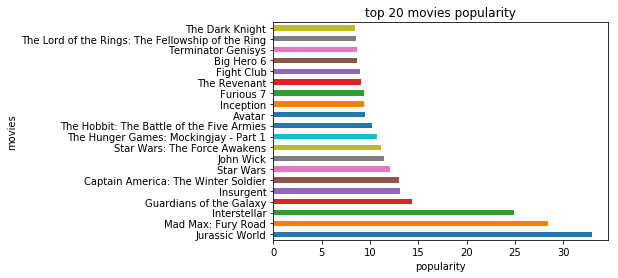

In [83]:
movies_data.groupby('original_title')['popularity'].sum().sort_values(ascending=False)[:20].plot.barh()
plt.title('top 20 movies popularity')
plt.xlabel('popularity')
plt.ylabel('movies')


# insight
Jurassic World was with the highest popularity

###  correlation between:


### (1) what is the correlation between budget and revenues ?


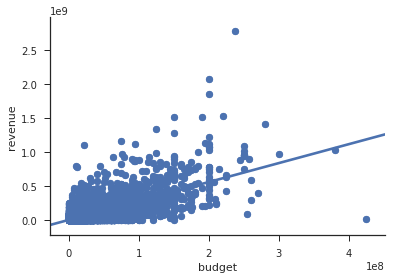

In [237]:
plt.scatter(x=movies_data["budget"], y=movies_data["revenue"])   
sns.set_style('ticks')
sns.regplot(movies_data.budget, movies_data.revenue, ci=None)
sns.despine()  


# insight
as expected the higher budget reflects on revenues with +ve

# (2)what is the correlation between revenues and popularity ?

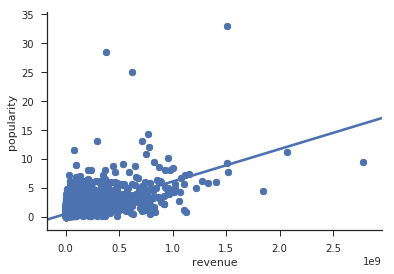

In [236]:
plt.scatter(x=movies_data["revenue"], y=movies_data["popularity"])
sns.set_style('ticks')
sns.regplot(movies_data.revenue, movies_data.popularity, ci=None)
sns.despine()  


# (3) whats is the correlation between runtime and popularity

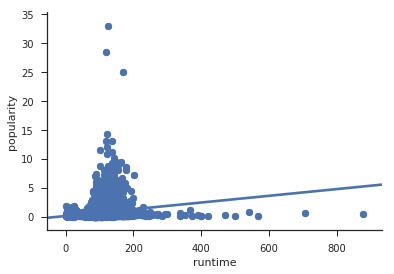

In [246]:
plt.scatter(x=movies_data["runtime"], y=movies_data["popularity"]) 
sns.set_style('ticks')
sns.regplot(movies_data.runtime, movies_data.popularity, ci=None)
sns.despine()  



# insights
movies with long runtime not necessary with high popularity

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

# conclousions passed on analyzing the top 20 ranks in each category
# just to give a general tips about uniqe values 


# 2010 was the highest productivity year in movies production

# Drama is highest genre in production, thats indicates movie audience's taste


# paramount pictures has the highest share in movie industry

# Steven Spielberg was the master(one of my favorite directors)
# Walt Disney Pictures|Pixar Animation Studios has the highest revenues with       7.648559e+09   

# avatar was the highest revenues with 2.781506e+09


# The Warrior's Way was the movie shows highest budget 425000000.0


# Jurassic World was with the highest popularity with 32.985763 votes

# as expected the higher budget reflects on revenues with +ve


# as expected the higher popularity reflects on revenues with +ve

# movies with long runtime not necessary with high popularity


# Limitations

# 1- null values
# 2- the absence of alot of data which have 0 values instead
# 3-complicated data ex.genres contains too many subcategories

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0